In [63]:
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [64]:
# getting all of the names and strings of the molecules for future reference
class Molecule(object):
    def __init__(self,i,name,smile):
        self.index = i
        self.name = name
        self.smile = smile

molecules = []

with open('database.txt','r') as f:
    index = 0
    for line in f:
        if line[0] == '#':
            continue
        smile = line.split(';')[1]
        name = line.split(';')[2]
        molecules.append(Molecule(index, name, smile))
        index += 1 

In [77]:
# opening all of the results

# df = pd.DataFrame(columns=['ligand A', 'ligand B', 'vacuum variance', 'solvent variance'])
results = []

all_files = os.listdir()
for folder in [x for x in all_files if x[0:3] == 'lig']:
    with open(f'{folder}/results.txt','r') as f:
        for line in f:
            details = line.split(',')
            if details[0] == 'ligands':
                a = details[1]
                b = details[2]
            elif details[0] == 'vacuum':
                vacddg = details[2]
            elif details[0] == 'solvent':
                solddg = details[2]                
        # efficiency is log10(1/var)
        results.append([int(a),int(b),np.log10(float(vacddg)**-1),np.log10(float(solddg)**-1)])

In [79]:
df = pd.DataFrame(results,columns=['ligand A', 'ligand B', 'vacuum efficiency', 'solvent efficiency'])    
df.head()

,ligand A,ligand B,vacuum efficiency,solvent efficiency
0,0,49,3.837325,1.905048
1,8,136,2.070911,1.434029
2,4,217,2.024294,1.347729
3,13,266,3.828545,1.245822
4,4,319,2.160709,1.389169


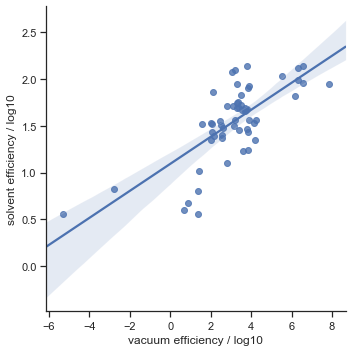

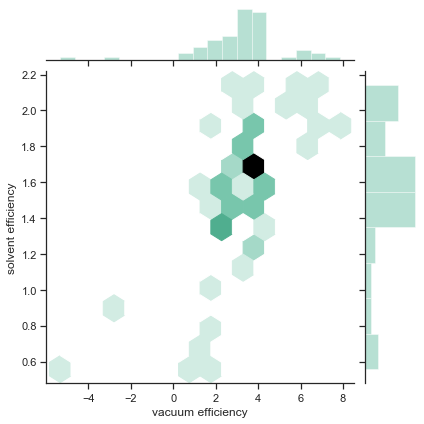

In [92]:
# sns.lmplot(x="vacuum variance", y="solvent variance", data=df)

# f, ax = plt.subplots(figsize=(7, 7))
# ax.set(xscale="log", yscale="log")
sns.lmplot(x="vacuum efficiency", y="solvent efficiency", data=df)
plt.xlabel('vacuum efficiency / log10')
plt.ylabel('solvent efficiency / log10')
plt.show()

sns.jointplot(x="vacuum efficiency", y="solvent efficiency", data=df, kind="hex", color="#4CB391")
plt.show()

In [93]:
for index, row in df.iterrows(): # iterrows casts ints as floats, but itertuples is uglier
    print(molecules[int(row['ligand A'])].name, molecules[int(row['ligand B'])].name)

 methyl hexanoate  hexanoic acid
 2,2,4-trimethylpentane  2,2-dimethylpentane
 phenyl formate  2-methoxyphenol
 1-iodopropane  propanenitrile
 phenyl formate  2-methoxyaniline
 2,2,4-trimethylpentane  2,3,4-trimethylpentane
 1,3-dichlorobenzene  1,2,3-trichlorobenzene
 1-iodopropane  isobutane
 methyl hexanoate  ethyl pentanoate
 methyl propanoate  butyric acid
 1,3-dichlorobenzene  3-chlorophenol
 1-iodopropane  propane
 phenyl formate  anisole
 methyl propanoate  ethyl acetate
 1,3-dichlorobenzene  1,2,4-trichlorobenzene
 1,3-dichlorobenzene  1,3,5-trichlorobenzene
 1-iodopropane  propan-1-ol
 1-iodopropane  propan-2-ol
 1-iodopropane  2-bromopropane
 methyl propanoate  methyl 2-chloroacetate
 methyl propanoate  methyl acetate
 methyl hexanoate  ethyl hexanoate
 methyl propanoate  ethyl propanoate
 1-iodopropane  1-bromopropane
 phenyl formate  3-methoxyphenol
 1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene  1,2,4,5-tetrachloro-3-(3,4-dichlorophenyl)benzene
 2,2,4-trimethylpentane